# PRUEBA DATA SCIENTIST GLOBANT

##### Julián Cujabante V.
- Entrega antes del Martes 10 de Noviemnre del 2020.

### CARGA DE BASE DE DATOS

In [431]:
import pandas as pd
import numpy as np
import pandas_profiling

In [432]:
data=pd.read_csv(r'E:\Users\julian\Globant\dataset_diabetes\diabetic_data.csv', sep=',',engine='python')

In [433]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


- Las dimensiones del data frame son más de 100k observaciones y 50 variables, entre las cuales se incluye la variable dependiente.

In [434]:
data.shape

(101766, 50)

- La distribución de frecuencia de la variable dependiente:

In [435]:
print(data['readmitted'].value_counts())

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64


- Cómo puede observarse en los datos cuando hay un missing se codifica como ?, se codificará como missing en Python.

In [436]:
data=data.replace(['?'],np.nan)

In [437]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


- Se revisa la cantidad de missings presentes en la base de datos

In [438]:
data.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

- Note en cuales variables se ubican los missing: 'race', 'weigth', 'payer code', 'medical specialty', y variables de dianostico. Todas son variables categóricas. Existen varias aproximaciones para tratar con los missing, entr eellas, eliminar las observaciones (aproximación que no se llevará a cabo, pues la cantidad de missing es muy alta. Puede de igual manera, imputarse los valores de estos missings, ya sea con la media de la variable, o con métodos como KNN. No obstante, en algunas de las variables, imputar los valores tendría implicaciones fuertes, cómo lo es en el caso de diagnóstico, imputar a una persona con la media de ocurrencia un diagnostico que no corresponde, podría afectar la predicción de la variable dependiente. Se opta por otra aproximación que coincide con la llevada a cabo en el paper asociado a las base de datos: eliminar algunas de estas variables, como por ejemplo: 'payer_code', 'weight'.

- Revisando la estructura de la base de datos, se observa el tipo de datos bajo el cúal están codificadas algunas variables:

In [439]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

- Observe que alguans de las variables están codificadas en un tipo de dato que posiblemnete no le corresponda. Ejemplo de esto son los identificadores de encuentro y de paciente, que están codificados como números, cuando en realidad no tiene sentido que lo sean. De ser números, piense si tendría sentido realizar una operación aritmética entre estos. De igual manera, algunas de las variables que se consiera capturan clases o tipos están codificadas como objectos (string), se cambiarán a la clase catagoria.

In [440]:
data.loc[:, data.dtypes == 'object'] =data.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [441]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   encounter_id              101766 non-null  int64   
 1   patient_nbr               101766 non-null  int64   
 2   race                      99493 non-null   category
 3   gender                    101766 non-null  category
 4   age                       101766 non-null  category
 5   weight                    3197 non-null    category
 6   admission_type_id         101766 non-null  int64   
 7   discharge_disposition_id  101766 non-null  int64   
 8   admission_source_id       101766 non-null  int64   
 9   time_in_hospital          101766 non-null  int64   
 10  payer_code                61510 non-null   category
 11  medical_specialty         51817 non-null   category
 12  num_lab_procedures        101766 non-null  int64   
 13  num_procedures            101

- Cuantas diferentes clases hay en las variables categóricas?

In [442]:
print("Número de categorias en: ")
for ColName in data.select_dtypes(['category']):
    print("{} = {}".format(ColName,       len(data[ColName].unique())))

Número de categorias en: 
race = 6
gender = 3
age = 10
weight = 10
payer_code = 18
medical_specialty = 73
diag_1 = 717
diag_2 = 749
diag_3 = 790
max_glu_serum = 4
A1Cresult = 4
metformin = 4
repaglinide = 4
nateglinide = 4
chlorpropamide = 4
glimepiride = 4
acetohexamide = 2
glipizide = 4
glyburide = 4
tolbutamide = 2
pioglitazone = 4
rosiglitazone = 4
acarbose = 4
miglitol = 4
troglitazone = 2
tolazamide = 3
examide = 1
citoglipton = 1
insulin = 4
glyburide-metformin = 4
glipizide-metformin = 2
glimepiride-pioglitazone = 2
metformin-rosiglitazone = 2
metformin-pioglitazone = 2
change = 2
diabetesMed = 2
readmitted = 3


- Se observa como hay unas variables categóricas que tienen muchas categorías, cómo lo son los códigos de diagnóstico basados en la codificación ICD9. Asimismo, se nota una gran cantidad de categorías en la variable: 'medical specialty' de quién remitió.

- Se cambia la codificación de tipo numérico que tienen las variables identificadoras (id's).

In [443]:
data=data.astype({'encounter_id':'category','patient_nbr':'category','admission_type_id': 'category','discharge_disposition_id': 'category','admission_source_id': 'category'})

- Se considera que un manejo de las categorías de diagnóstico al agruparlas según su clasificación ICD9 podrí areducir la cantidad de categorías y permitir una clasificación más efectiva pro parte de la máquina de aprendizaje empleada. Se realizará en ese orden de ideas, un procedimiento similar al realizado por los autores en el Paper relacionado con esta base de datos.

- Se agrupan las categorias de diagnostico 1 en los grupos codificados en ICD9

In [444]:
def cat(x):
    if x>='1' and x<='139': 
        return "Infectious and parasitic diseases"
    if x>='140' and x<='239':
        return "Neoplasms"
    if x>='240' and x<='279':
        return 'Endocrine nutritional and metabolic diseases'
    if x>='280' and x<='289':
        return 'Diseases of the blood and blood forming organs'
    if x>='290' and x<='319':
        return 'Mental disorders'
    if x>='320' and x<='389':
        return 'Diseases of the nervous system and sense organs'
    if x>='390' and x<='459':
        return 'Diseases of the circulatory system'
    if x>='460' and x<='519':
        return 'Diseases of the respiratory system'
    if x>='520' and x<='579':
        return 'Diseases of the digestive system'
    if x>='580' and x<='629':
        return 'Diseases of the genitourinary system'
    if x>='630' and x<='679':
        return 'Complications of pregnancy childbirth and the puerperrium'
    if x>='680' and x<='709':
        return 'Diseases of the skin and subcutaneous tissue'
    if x>='710' and x<='739':
        return 'Diseases of the musculoskeletal system and cognitive'
    if x>='740' and x<='759':
        return 'Congetinal anomalies'
    if x>='760' and x<='779':
        return 'Certain conditions originating in the perinatal period'
    if x>='780' and x<='799':
        return 'Symptoms signs and ill defined conditions'
    if x>='800' and x<='999':
        return 'Injury and poisoning'
    if x>='V01' and x<='V89':
        return 'Suplementary classification of factors influencing health status and contact with health services'
    if x>='E800' and x<='E900':
        return 'Suplementary classification of external causes of injury and poisoning'
    if x=='8':
        return 'Infectious and parasitic diseases'

In [445]:
data['diagnose_1'] = data['diag_1'].apply(lambda x: cat(x))

- A pesar que se redujeron categorías siguen siendo una cantidad considerable.
- Se cuenta la distribución de estas categorias en la variable diagnose_1

In [446]:
pd.value_counts(data['diagnose_1'])

Diseases of the circulatory system                                                                   30389
Endocrine nutritional and metabolic diseases                                                         11461
Diseases of the respiratory system                                                                   10449
Diseases of the digestive system                                                                      9276
Symptoms signs and ill defined conditions                                                             7722
Injury and poisoning                                                                                  7046
Diseases of the genitourinary system                                                                  5079
Diseases of the musculoskeletal system and cognitive                                                  4957
Neoplasms                                                                                             3435
Diseases of the nervous system and se

- Se puede ver cómo hay algunas de las categorías que se repiten mucho y otras que no tienen casi frecuencia.
- Se ve esta misma información en términos porcentuales

In [447]:
100 * data['diagnose_1'].value_counts() / len(data['diagnose_1'])

Diseases of the circulatory system                                                                   29.861643
Endocrine nutritional and metabolic diseases                                                         11.262111
Diseases of the respiratory system                                                                   10.267673
Diseases of the digestive system                                                                      9.115029
Symptoms signs and ill defined conditions                                                             7.587996
Injury and poisoning                                                                                  6.923727
Diseases of the genitourinary system                                                                  4.990861
Diseases of the musculoskeletal system and cognitive                                                  4.870979
Neoplasms                                                                                             3.375391
D

- Se gráfica la distribución de categorías en la variable recién creada: 'diagnose_1'.

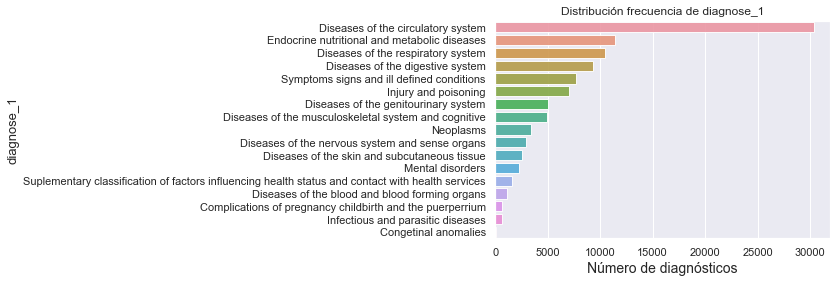

In [448]:
import matplotlib.pyplot as plt
import seaborn as sns
diagnose1_count = data['diagnose_1'].value_counts()
sns.set(style="darkgrid")
sns.barplot(diagnose1_count.values,diagnose1_count.index, alpha=0.9)
plt.title('Distribución frecuencia de diagnose_1')
plt.ylabel('diagnose_1', fontsize=13)
plt.xlabel('Número de diagnósticos', fontsize=14)
plt.show()

- Al igual que como se hizo en el paper, se reducen las categorias al tomar las que más freuencia tengan y agrupar las demás en una categoría llamada 'other'. Se eligen las 5 categorías con más frecuencia.

In [449]:
top_diagnose_1 = data['diagnose_1'].isin(data['diagnose_1'].value_counts().index[:5])
data.loc[~top_diagnose_1, 'diagnose_1'] = "other"

- Se grafica de nuevo la variable categórica 'diagnose_1' luego de reducir la cantidad de categorias.

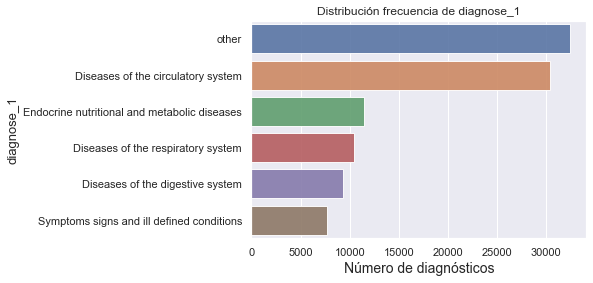

In [450]:
diagnose1_count = data['diagnose_1'].value_counts()
sns.barplot(diagnose1_count.values,diagnose1_count.index, alpha=0.9)
plt.title('Distribución frecuencia de diagnose_1')
plt.ylabel('diagnose_1', fontsize=13)
plt.xlabel('Número de diagnósticos', fontsize=14)
plt.show()

In [451]:
data=data.astype({'diagnose_1':'category'})

- Se encuentra que hay más de 30k registros de números de pacientes que son duplicados.
- Al igual que cómo se hizo en el paper, se eliminarán los repetidos y sólo se dejará el primer encuentro, la razón de esto, es que posiblemente un registro duplicado está conectado y correlacionado con los registros anteriores, piense en una enfermedad crónica. En ese orden de ideas estos casos podrían sesgar al algorito.

In [452]:
data['patient_nbr'].duplicated().sum()

30248

In [453]:
data.drop_duplicates('patient_nbr',keep='first',inplace=True)

- Queda esta cantidad de observaciones, luego de eliminar los registros duplicados de pacientes.

In [454]:
len(data)

71518

- Hay algunas variables que se cree no son relevantes para el análisis, pues no se considera haya una relación clara entre estas y la variable a predecir. Estas por ejemplo son: 'payer code' (la manera con la que pago probablemente no se relacione con si tiene que volver a ser admitido o no)

- Se eliminan variables

In [455]:
data=data.drop(['payer_code','diag_1','diag_2','diag_3','patient_nbr','encounter_id','weight','race','medical_specialty','admission_type_id','discharge_disposition_id','admission_source_id'],axis=1)

In [456]:
data.isnull().sum()

gender                      0
age                         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
examide                     0
citoglipton                 0
insulin                     0
glyburide-metformin         0
glipizide-metformin         0
glimepiride-pioglitazone    0
metformin-

- Esta es la dimensión del nuevo data frame: más de 70k observaciones y 39 variables.

In [457]:
data.shape

(71518, 39)

- Se separa la base de datos en su parte numércia y categórica.

In [458]:
data_num = data.select_dtypes(include=['int64']).copy()

In [459]:
data_cat = data.select_dtypes(include=['category']).copy()

- La distribución de la variable dependiente luego de la eliminación de duplicados es:

In [460]:
print(data['readmitted'].value_counts())

NO     42985
>30    22240
<30     6293
Name: readmitted, dtype: int64


- Importante recalcar que las proporciones de la variable a predecir disminuyeron considerablemente. Se puede ver que hay un posible desbalance en los datos frente a la categoria: '<30'.

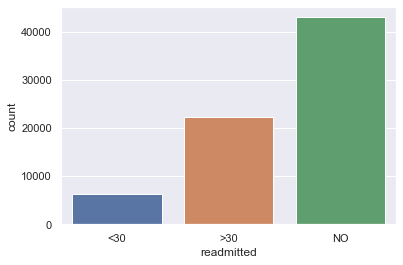

In [461]:
sns.countplot(data['readmitted'])

## EXPLORACIÓN DE LOS DATOS

### Datos numéricos

- Se presentan estadísticas descriptivas de las variables numéricas

In [462]:
data_num.describe()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,71518.00000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000
mean,4.28913,43.075478,1.430577,15.705025,0.280069,0.103540,0.177829,7.245700
std,2.94921,19.952338,1.759864,8.311163,1.068957,0.509187,0.603790,1.994674
min,1.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.00000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,3.00000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,8.000000
75%,6.00000,57.000000,2.000000,20.000000,0.000000,0.000000,0.000000,9.000000
max,14.00000,132.000000,6.000000,81.000000,42.000000,42.000000,12.000000,16.000000


- Se soportará este análisis con las gráficas de distribución sobre estas variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018F83C58CA0>,
      dtype=object)

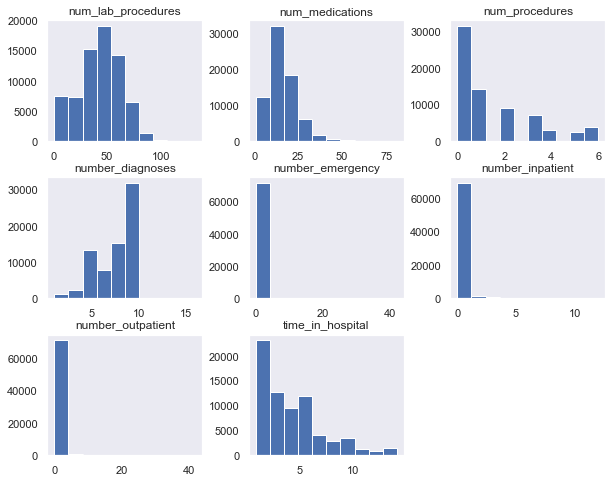

In [463]:
data.hist(figsize=(10,8),grid=False)

- Note que la variable 'numb_lab_procedures' tiene cierta forma 'normal, con una gran acumulación de frecuencia cerca de su media.
- La variable 'num_medications' tiende a concetrar más peso de su distribución en su cola izquierda. Los valores 'pequeños' son más frecuentes.
- La variable 'num_procedures' aparece en saltos.
- La variable 'num_diagnoses' esta sesgada hacia la derecha, al parecer son más frecuentes los valores más altos.
- Las siguientes variables: 'number_emergency', 'number_inpatient', 'number_outpatient' concentran su mayoría de distribución en los valores más pequeños. Note que los valores máximos se alejan mucho de la media, probablemnete hayan outliers aqui.
- Finalmente, la variable 'time_in_hospital' muestra que es más frecuente estar entre 1 y 5 días en el hospital, siendo menos fecuente las estancias largas.

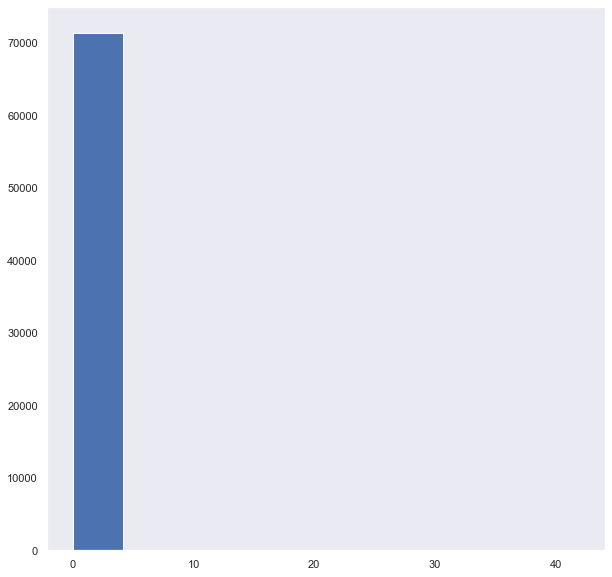

In [464]:
data['number_emergency'].hist(figsize=(10,10), grid=False)

- Se realiza una matriz de correlación entre las variables:

- Existe correlación positiva entre el numero de procedimientos, de pruebas de laboratorio y los días transcurridos en el hospital. Esto podría ser lógico, pues si un paciente está grave o al menos no estable como para ser remitido a su casa, indica que muy probablemente se le realicen varios procedimientos y pruebas médicas con el ánimo de curarlo. Es posible que haya cierta multicolinealidad entre estas variables.

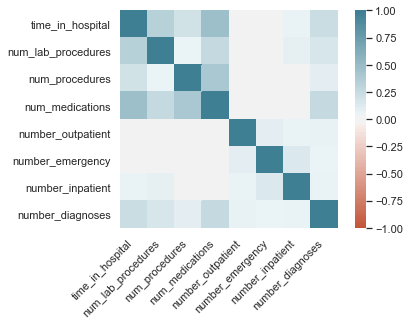

In [465]:
corr=data.corr()
ax=sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20,220,n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right');

- Se grafican boxplots para ayudar a discernir sobre la distribución de estas variables.

In [466]:
import matplotlib.pyplot as plt

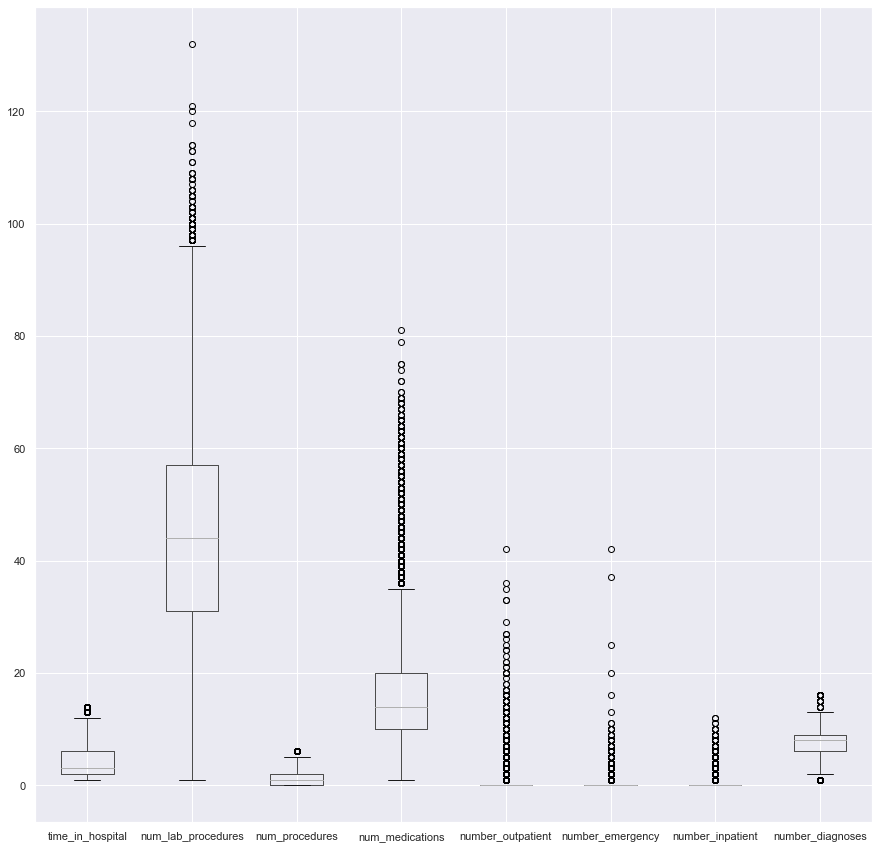

In [467]:
data_num.boxplot(figsize=(15,15))
    

- Hay outliers, sobre todo en las variables: 'number_outpatient', 'number_emergency', 'number_inpatient', 'num_medications'. Estos valores pueden asociarse quizá con aquellas observaciones de pacientes 'graves'. Una aproximación para tratar los outliers es eliminarlos, pero se desiste de esta opción, pues no se quiere perder más datos, otra podría ser imputar los valores, pero como ya se vió en muchas de estas su valor se concentra en 1, de imputarseles este valor se perderia variación en estas variables, pues todas tendrían valor 1.

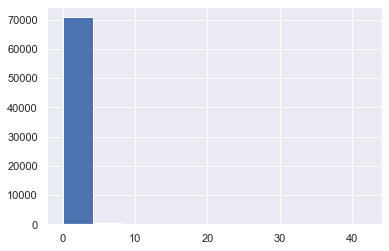

In [468]:
data['number_outpatient'].hist()

##### Distribución de las variables categóricas

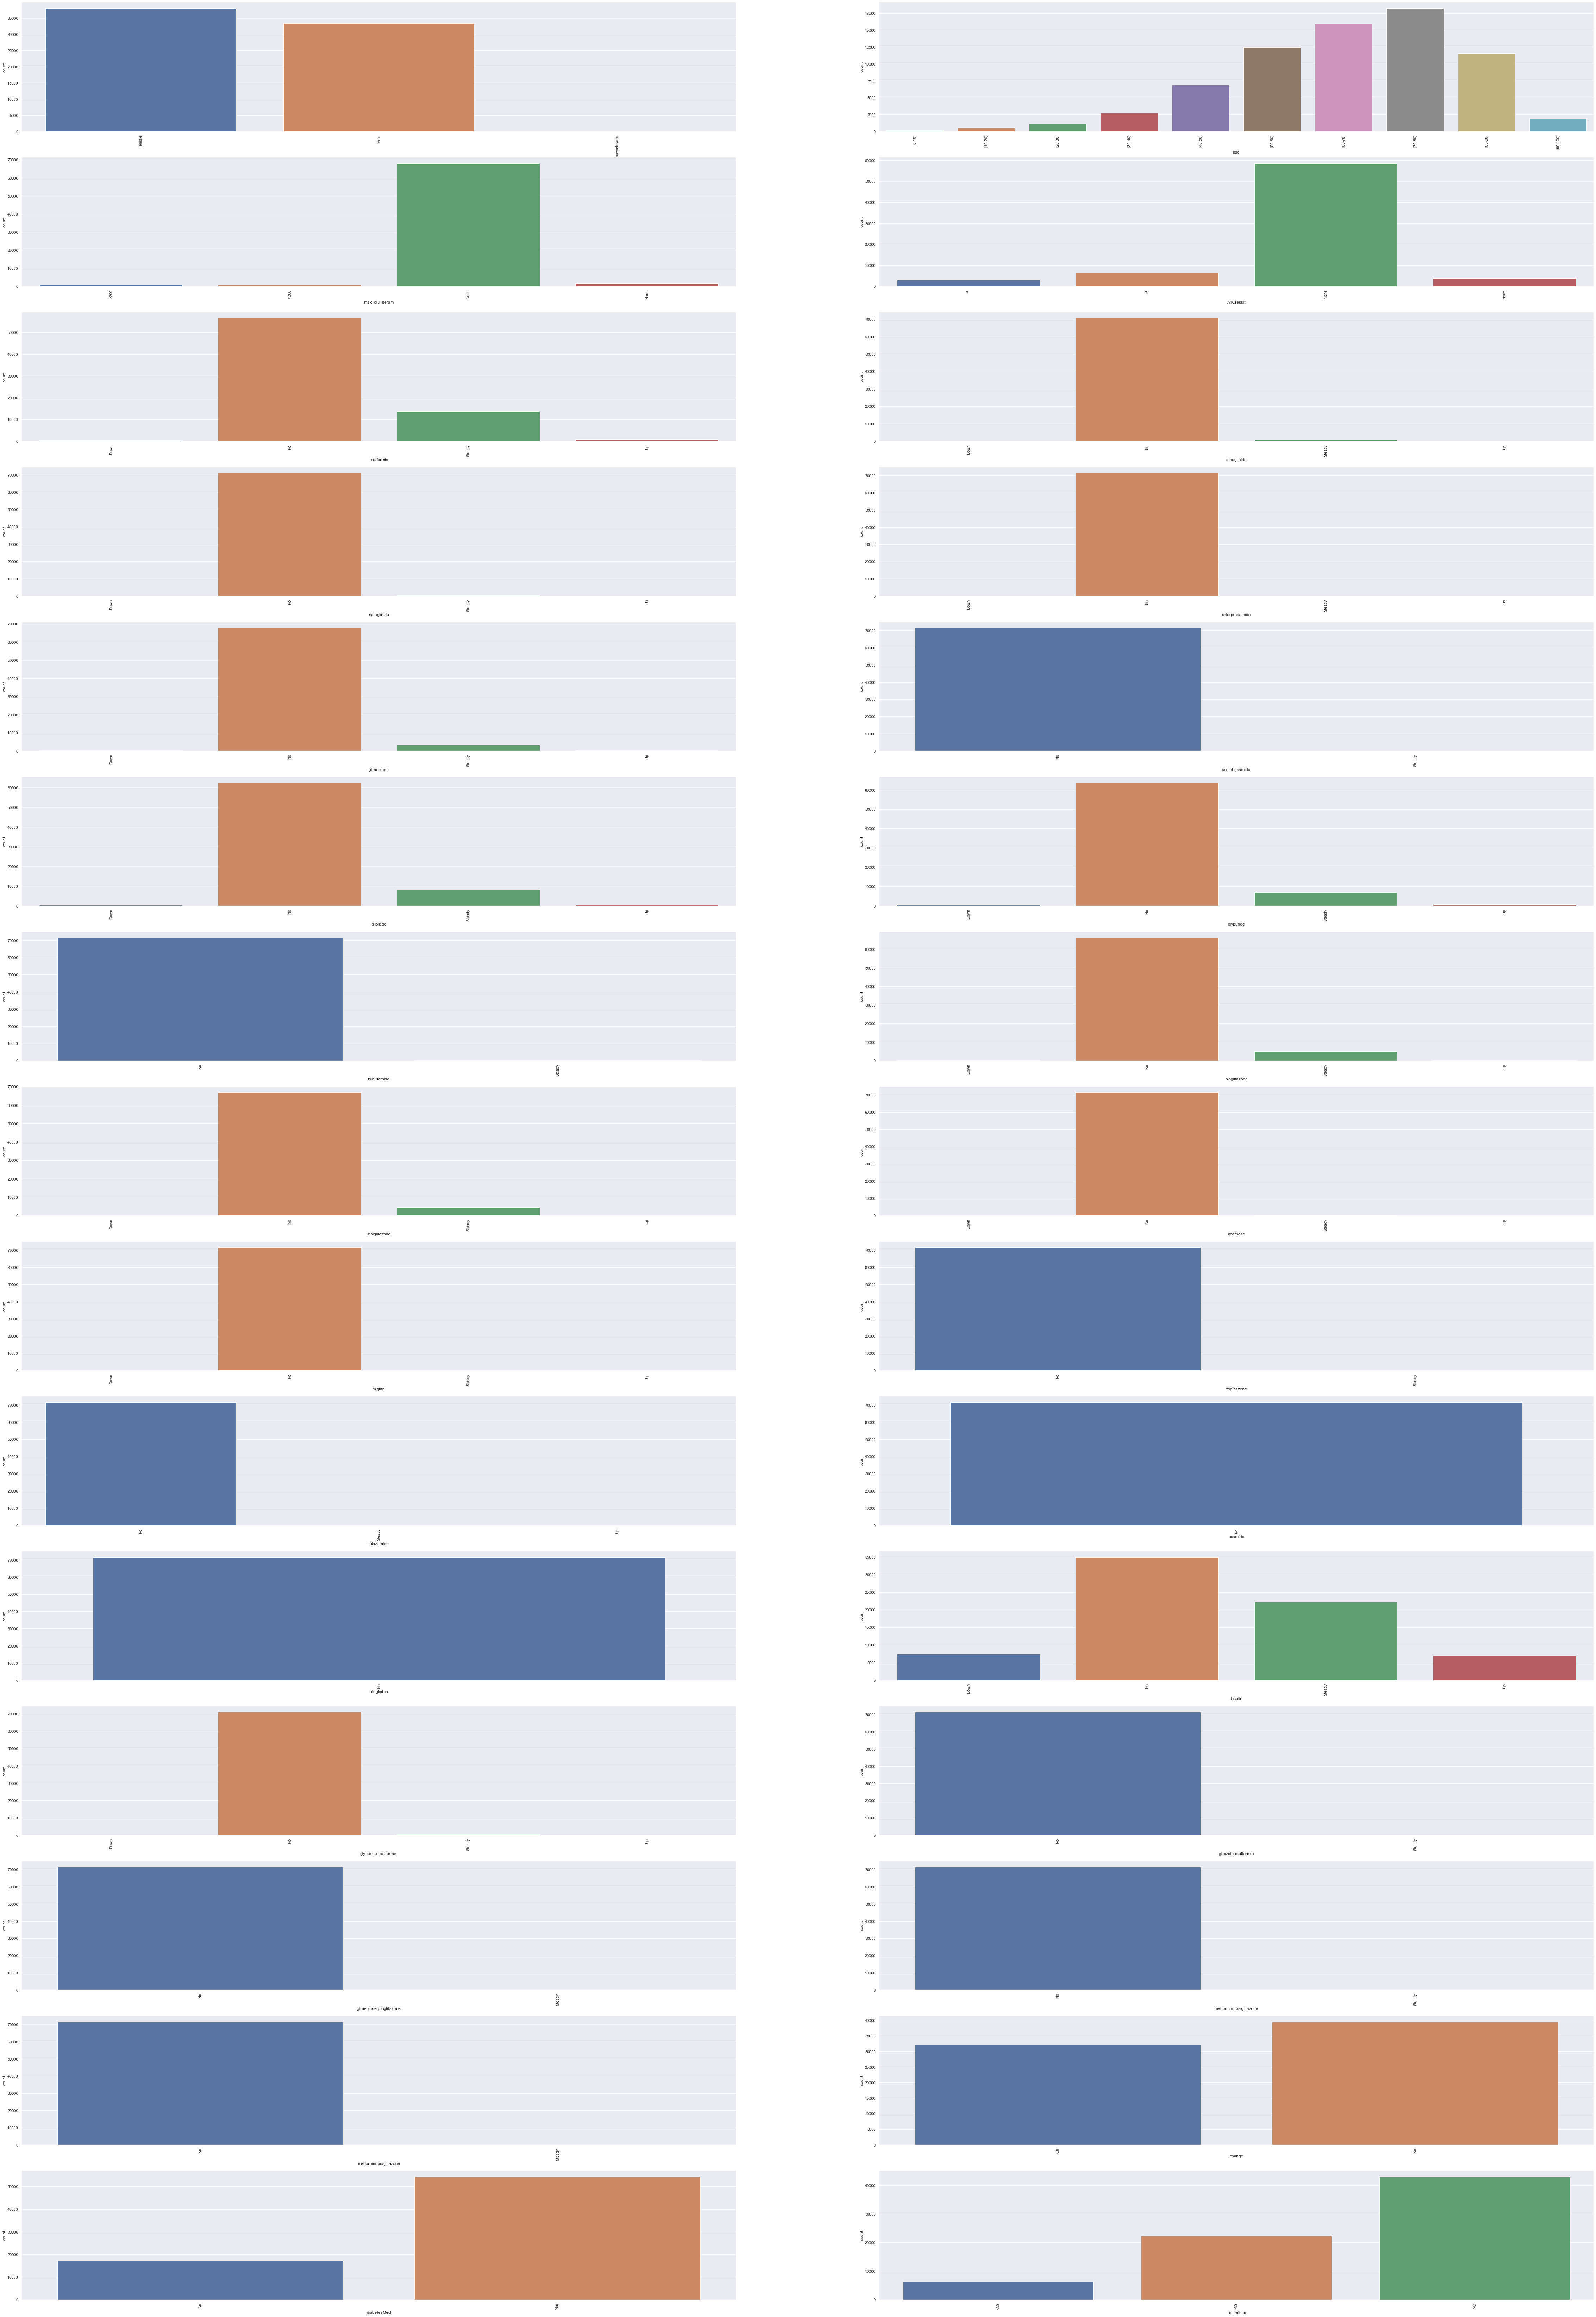

In [582]:
fig, ax = plt.subplots(15,2, figsize=(80, 120))
for variable, subplot in zip(data_cat, ax.flatten()):
    sns.countplot(data_cat[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

## FEATURE ENGINEERING

- Se realizarán una serie de tratamientos y preprocesamientos para las variables de la base antes de ser pasadas por la máquina de aprendizaje.

- Se obtiene el valor de la variable dependiente y se guarda.

In [471]:
y=data.readmitted.values

In [472]:
#data=data.drop(['readmitted'],axis=1)

- Esta variable contiene muchas variables categóricas. Estás deben de procesarse antes de ser pasadas a los algortimos. La mayoria de los algortimos evaluados sólo permiten valores numéricos, por tal motivo, estas categorías deben de numerizarse. Una manera para hacerlo es con One Hot Encoding, o crear tantas variables binarias por cada categoría contenida en la variable. La razón paar hacer esto es que de numerizarse las categorias dentro de la misma variable, se le podría estar diciendo al algortimo que existe una especie de orden, cuando en realidad no es así. Piense en el ejemplo de 'gender' codificar las categorias de esta variable con númros en una sola variable daría que para mujer se usaria un úmero: digamos 1 y para hombres 2. Esto implicaría orden? o que la categoría hombre es dos veces la categoría mujer? no. Por tal motivo se usa el One Hot Encoding. Debe tenerse cuidado de eliminar unas de las variables binarias recién creadas para las categorías contenidas en una variable, para no caer en la trampa de la variable dicotoma, que es lo mismo que tener multicolinealidad perfecta si se incluyen todas las variables binarias de las categorias contenidas en una variable. Otro posible problema de esta aproximación es que se crean muchas variables y puede generar mucha complejidad en el modelo añadiendole varianza y en el peor de lso casos cayendo en la maldición de la dimensionalidad.

### One Hot Encoding

- Teniendo en cuenta lo anterior se realizar la binariazción de las variables categóricas y se elimina una de las recién creadas variables binarias.

In [473]:
data_dummies=pd.get_dummies(data.loc[:, data.columns != 'readmitted'],drop_first=True)

- La dimensión del nuevo data frame es: las mismas observaciones, pero 80 variables.

In [474]:
data_dummies.shape

(71518, 80)

### Frequency Encoding

- Se realiza también un encoding de las variables categóricas basado en la frecuencia relativa de la categoría en cada varaible, esto evitaría generar muchas variables adicionales y se obtendría un valor numérico dela categoría. En ese orden de ideas, si la variable 'gender': tiene las categorías 'hombre ' y 'mujer', se calculará la frecuencia relativa de cada categoría dentro de la variable y se le asignará este valor numérico, pro ejemplo si la categoría mujer es un 76% en la variable 'gender', se le asignara esta frecuencia a cada observación que tenga esta categoría asignada.

In [475]:
data_cat_freq = data_cat.loc[:, data_cat.columns != 'readmitted'].copy()
for c in data_cat_freq.columns.to_list():
    data_cat_freq[c] = data_cat_freq.groupby(c).transform('count')/len(data_cat_freq[c])

In [476]:
frames_freq = [data_cat_freq, data_num]
data_freq = pd.concat(frames_freq, axis = 1)

- Se mantiene el mismo número de variables.

In [477]:
data_freq.shape

(71518, 38)

- Se observa ahora las distribuciones de las varaibles.

In [478]:
data_freq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71518 entries, 0 to 101765
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gender                    71518 non-null  float64
 1   age                       71518 non-null  float64
 2   max_glu_serum             71518 non-null  float64
 3   A1Cresult                 71518 non-null  float64
 4   metformin                 71518 non-null  float64
 5   repaglinide               71518 non-null  float64
 6   nateglinide               71518 non-null  float64
 7   chlorpropamide            71518 non-null  float64
 8   glimepiride               71518 non-null  float64
 9   acetohexamide             71518 non-null  float64
 10  glipizide                 71518 non-null  float64
 11  glyburide                 71518 non-null  float64
 12  tolbutamide               71518 non-null  float64
 13  pioglitazone              71518 non-null  float64
 14  rosig

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018F8C9B54C0>,
      dtype=object)

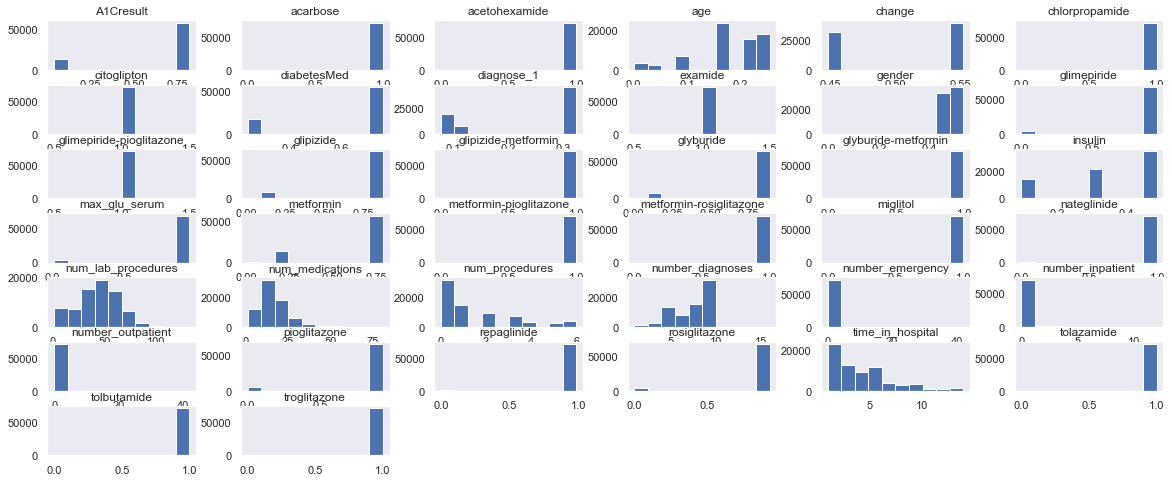

In [479]:
data_freq.hist(figsize=(20,8), grid=False)

In [480]:
data_freq.describe()

,gender,age,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,...,diabetesMed,diagnose_1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,...,71518.000000,71518.000000,71518.00000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000,71518.000000
mean,0.501969,0.182961,0.906569,0.682030,0.661680,0.974406,0.986166,0.997988,0.900251,0.999972,...,0.634696,0.232916,4.28913,43.075478,1.430577,15.705025,0.280069,0.103540,0.177829,7.245700
std,0.031808,0.068290,0.200182,0.289706,0.251010,0.110417,0.082052,0.031654,0.201602,0.003739,...,0.221824,0.107163,2.94921,19.952338,1.759864,8.311163,1.068957,0.509187,0.603790,1.994674
min,0.000042,0.002153,0.010571,0.040423,0.006082,0.000405,0.000112,0.000014,0.001930,0.000014,...,0.240485,0.078288,1.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.468274,0.162043,0.951677,0.818423,0.790388,0.987052,0.993037,0.998993,0.947636,0.999986,...,0.759515,0.094717,2.00000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,0.531684,0.174306,0.951677,0.818423,0.790388,0.987052,0.993037,0.998993,0.947636,0.999986,...,0.759515,0.305615,3.00000,44.000000,1.000000,14.000000,0.000000,0.000000,0.000000,8.000000
75%,0.531684,0.254621,0.951677,0.818423,0.790388,0.987052,0.993037,0.998993,0.947636,0.999986,...,0.759515,0.323583,6.00000,57.000000,2.000000,20.000000,0.000000,0.000000,0.000000,9.000000
max,0.531684,0.254621,0.951677,0.818423,0.790388,0.987052,0.993037,0.998993,0.947636,0.999986,...,0.759515,0.323583,14.00000,132.000000,6.000000,81.000000,42.000000,42.000000,12.000000,16.000000


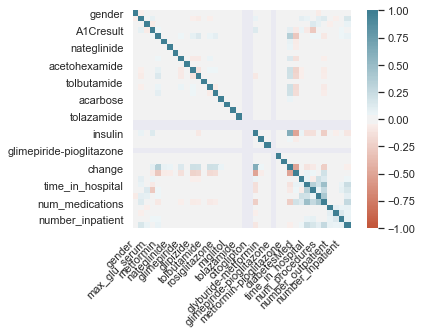

In [481]:
corr_freq=data_freq.corr()
ax=sns.heatmap(corr_freq, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20,220,n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45, horizontalalignment='right');

### Escalación de los datos 

- Se realiza también la esclación de los datos para tener la misma escala o dimensión de las variables y permitir un mejor desempñeo en los algortimos de clasificación.

In [482]:
col_namesd = data_dummies.columns.tolist()

In [483]:
col_namesf = data_freq.columns.tolist()

In [484]:
type(col_namesd)

list

##### MinMax

- La esclación MinMax deja todas las variables con valores entre 0 y 1. Esta es útil en escenarios con muchas variables dummies, pues las deja cómo estan, y todas las demás variables en valores similares a estas dummies.

In [485]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scalerMM = MinMaxScaler()

In [486]:
data_MMd = scalerMM.fit_transform(data_dummies)
data_scaledMMd=pd.DataFrame(data_MMd)
data_scaledMMd.columns=col_namesd
data_scaledMMd.head()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,gender_Male,gender_Unknown/Invalid,...,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes,diagnose_1_Diseases of the digestive system,diagnose_1_Diseases of the respiratory system,diagnose_1_Endocrine nutritional and metabolic diseases,diagnose_1_Symptoms signs and ill defined conditions,diagnose_1_other
0,0.000000,0.305344,0.000000,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.153846,0.442748,0.000000,0.2125,0.000000,0.0,0.000000,0.533333,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.076923,0.076336,0.833333,0.1500,0.047619,0.0,0.083333,0.333333,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.076923,0.328244,0.166667,0.1875,0.000000,0.0,0.000000,0.400000,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.381679,0.000000,0.0875,0.000000,0.0,0.000000,0.266667,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [487]:
data_MMf = scalerMM.fit_transform(data_freq)
data_scaledMMf=pd.DataFrame(data_MMf)
data_scaledMMf.columns=col_namesf
data_scaledMMf.head()

,gender,age,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,...,diabetesMed,diagnose_1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.118965,0.000000,0.305344,0.000000,0.0000,0.000000,0.0,0.000000,0.000000
1,1.000000,0.021101,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.118965,0.153846,0.442748,0.000000,0.2125,0.000000,0.0,0.000000,0.533333
2,1.000000,0.053888,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.000000,0.076923,0.076336,0.833333,0.1500,0.047619,0.0,0.083333,0.333333
3,0.880727,0.140950,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.000000,0.076923,0.328244,0.166667,0.1875,0.000000,0.0,0.000000,0.400000
4,0.880727,0.372397,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.000000,0.000000,0.381679,0.000000,0.0875,0.000000,0.0,0.000000,0.266667


##### Normalization

- Se usa también un escalamiento de los datos con la normalización, restando la media y dividiendo en su desviación estándar. Este tipo de escalamiento no se realiza en la aproximación de One Hot Encoding, pues la media de una variable dummy es la proporción de 1, no su media en si.

In [488]:
scalerN=StandardScaler()
data_Nf = scalerN.fit_transform(data_freq)
data_scaledNf=pd.DataFrame(data_Nf)
data_scaledNf.columns=col_namesf
data_scaledNf.head()

,gender,age,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,...,diabetesMed,diagnose_1,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,0.934243,-2.647649,0.225333,0.470802,0.512766,0.114532,0.083738,0.031745,0.235043,0.003739,...,-1.777151,-1.170616,-1.115266,-0.104022,-0.812896,-1.769323,-0.262004,-0.203346,-0.294524,-3.131210
1,0.934243,-2.569638,0.225333,0.470802,0.512766,0.114532,0.083738,0.031745,0.235043,0.003739,...,0.562698,-1.170616,-0.437113,0.798134,-0.812896,0.276134,-0.262004,-0.203346,-0.294524,0.879498
2,0.934243,-2.448425,0.225333,0.470802,0.512766,0.114532,0.083738,0.031745,0.235043,0.003739,...,0.562698,0.846072,-0.776190,-1.607616,2.028252,-0.325471,1.608992,-0.203346,1.361694,-0.624518
3,-1.059338,-2.126555,0.225333,0.470802,0.512766,0.114532,0.083738,0.031745,0.235043,0.003739,...,0.562698,0.846072,-0.776190,0.046337,-0.244667,0.035492,-0.262004,-0.203346,-0.294524,-0.123179
4,-1.059338,-1.270896,0.225333,0.470802,0.512766,0.114532,0.083738,0.031745,0.235043,0.003739,...,0.562698,0.846072,-1.115266,0.397175,-0.812896,-0.927076,-0.262004,-0.203346,-0.294524,-1.125856


### PCA

- Se propone la utilización de componentes principales con el ánimo de capturar la mayor cantidad de variación de múltiples variables en un sólo factor y reducir así la dimensionalidad. El problema de esto, es la interpretación de los PCA, pues ya no será tan simple cómo con las variables normalmente. Para realizar PCA se usan los valores escalados para que las diferentes medidas de unidades de las variables no afecte las combinaciones lienales de los factores.

In [489]:
from sklearn.decomposition import PCA

- Se obtiene PCA para los datos escalados por MinMAX para el dataframe que se le aplicó OneHot Encoding.
- Se gráfica la cantidad de varianza explicada por la cantida de factores, la idea es obtener un pareto, tratar de obtener el 80% de la variación explicada por los componentes. Esto ocurre entre 10 y 20 componenetes.

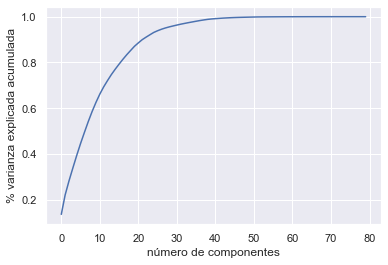

In [490]:
pcaMMd = PCA().fit(data_scaledMMd)
plt.plot(np.cumsum(pcaMMd.explained_variance_ratio_))
plt.xlabel('número de componentes')
plt.ylabel('% varianza explicada acumulada');

- Se apoya la elección del número de componentes con el 'gráfico de codo', donde haya un cambio de pendiente en esta curva se elige este número de componentes. Note que los primeros componentes capturan el grueso de la variabilidad, a más componentes menos variabilidad capturan en términos marginales.

Text(0, 0.5, 'varianza %')

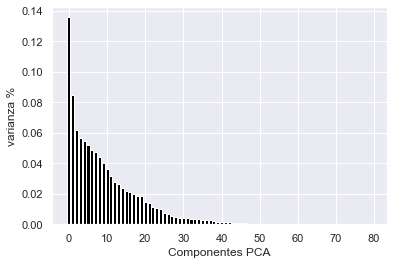

In [491]:
features = range(pcaMMd.n_components_)
plt.bar(features, pcaMMd.explained_variance_ratio_, color='black')
plt.xlabel('Componentes PCA')
plt.ylabel('varianza %')

- Dados los gráficos expuesto antes se elegirán 10 componentes.

In [492]:
pcaMMd = PCA(n_components=10) 
principalcomponentsMMd = pcaMMd.fit_transform(data_scaledMMd)
data_pcaMMd = pd.DataFrame(principalcomponentsMMd)
data_pcaMMd=data_pcaMMd.add_prefix('pca_')
data_pcaMMd.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9
0,-1.094340,-0.105000,-0.075409,-0.039856,0.638668,-0.092102,-0.144363,0.001645,0.014555,-0.196006
1,0.517688,-0.373315,-0.064261,0.088524,0.782632,0.391206,0.376028,-0.398874,0.243375,-0.583579
2,-0.517095,0.273031,-0.653870,-0.165553,-0.367094,1.077157,-0.508033,0.309420,-0.063972,0.273378
3,0.485144,-0.124198,0.096092,-0.152802,-0.558967,0.535531,0.874668,-0.143198,0.251017,-0.457618
4,0.857620,-0.336353,-0.019920,-0.134022,-0.972559,0.928636,-0.386515,0.510201,0.105067,0.315707


- Se realiza también para el data frame escalado con Frequency encoding.
- Los criterios de elección de lso componnetes siguen la misma lógica que lso descritos antes, usando las gráficas, por tal motivo no se explicará una y otra vez para los diferentes dataframes, con el ánimo de no ser redundantes.

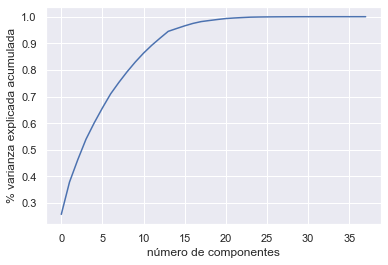

In [493]:
pcaMMf = PCA().fit(data_scaledMMf)
plt.plot(np.cumsum(pcaMMf.explained_variance_ratio_))
plt.xlabel('número de componentes')
plt.ylabel('% varianza explicada acumulada');

Text(0, 0.5, 'varianza %')

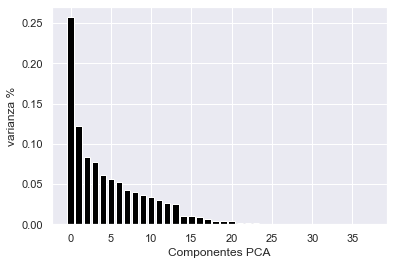

In [494]:
features = range(pcaMMf.n_components_)
plt.bar(features, pcaMMf.explained_variance_ratio_, color='black')
plt.xlabel('Componentes PCA')
plt.ylabel('varianza %')

In [495]:
pcaMMf = PCA(n_components=6) 
principalcomponentsMMf = pcaMMf.fit_transform(data_scaledMMf)
data_pcaMMf = pd.DataFrame(principalcomponentsMMf)
data_pcaMMf=data_pcaMMf.add_prefix('pca_')
data_pcaMMf.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5
0,-0.950160,0.644359,-0.119356,-0.024357,-0.327132,0.080656
1,0.706512,0.688374,-0.027069,-0.534847,-0.096875,-0.029671
2,-0.340271,-0.486120,-0.086505,0.009903,0.588102,0.597939
3,0.698302,-0.181254,0.126619,-0.580263,-0.080016,-0.045320
4,0.544866,-0.284850,-0.146796,-0.077729,0.071439,0.707113


- Se realiza PA para datos normalizados bajo frequency encoding.

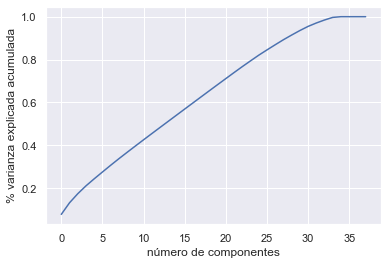

In [496]:
pcaNf = PCA().fit(data_scaledNf)
plt.plot(np.cumsum(pcaNf.explained_variance_ratio_))
plt.xlabel('número de componentes')
plt.ylabel('% varianza explicada acumulada');

Text(0, 0.5, 'varianza %')

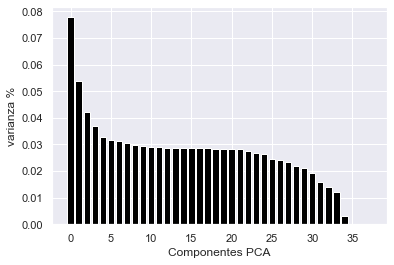

In [497]:
features = range(pcaNf.n_components_)
plt.bar(features, pcaNf.explained_variance_ratio_, color='black')
plt.xlabel('Componentes PCA')
plt.ylabel('varianza %')

In [498]:
pcaNf = PCA(n_components=4) 
principalcomponentsNf = pcaNf.fit_transform(data_scaledNf)
data_pcaNf = pd.DataFrame(principalcomponentsNf)
data_pcaNf=data_pcaNf.add_prefix('pca_')
data_pcaNf.head()

,pca_0,pca_1,pca_2,pca_3
0,-3.795728,1.875794,1.504943,-1.021182
1,0.951293,0.942866,2.373586,-0.124688
2,-1.043365,0.027474,-0.345863,0.607968
3,0.723177,1.103102,0.811238,-0.449733
4,-0.029851,1.752419,0.039725,-1.030484


# MODELADO-Clasificación

- Cómo se cuenta con diferentes datasets dependiendo del 'Encoding', del escalamiento y de si se les aplicó PCA. Se realizarán varias particiones de los datos para ser pasadas a los diferentes algoritmos de clasificación elegidos.

- Variables independientes de la aproximación OneHot Encoding.

In [499]:
xd=data_dummies.values

- Variables independientes de la aproximación frequency Encoding.

In [500]:
xf=data_freq.values

- Variables independientes de la aproximación escalación MinMax OneHot Encoding.

In [501]:
xscMd=data_scaledMMd.values

- Variables independientes de la aproximación escalación MinMax frequency Encoding.

In [502]:
xscMf=data_scaledMMf.values

- Variables independientes de la aproximación escalación normalización frequency Encoding.

In [503]:
xscNf=data_scaledNf.values

- Variables independientes de la aproximación PCA escalación MinMax OneHot Encoding.

In [504]:
xpcaMd=data_pcaMMd.values

- Variables independientes de la aproximación PCA escalación MinMax frequency Encoding.

In [505]:
xpcaMf=data_pcaMMf.values

- Variables independientes de la aproximación PCA escalación normalización frequency Encoding.

In [506]:
xpcaNf=data_pcaNf.values

- Distribución de la variable dependiente, esta será la misma para todas las aproximaciones propuestas arriba

In [507]:
print(data['readmitted'].values)

[NO, >30, NO, NO, NO, ..., >30, >30, >30, NO, NO]
Length: 71518
Categories (3, object): [<30, >30, NO]


In [508]:
y=data.readmitted.values

- Se codifica las categorías de la variable dependiente con enteros.

In [509]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
y

array([2, 1, 2, ..., 1, 2, 2])

In [510]:
list(labelencoder.classes_)

['<30', '>30', 'NO']

In [511]:
x=data.drop(columns=['readmitted'])

- Partición sets de entrenamiento y prueba de acuerdo a las aproximaciones propuestas

In [512]:
from sklearn import model_selection

-  Aproximación OneHot Encoding.

In [513]:
x_train1, x_test1, y_train1, y_test1 = model_selection.train_test_split(xd, y, test_size=0.2,stratify=y)

- Aproximación frequency Encoding.

In [514]:
x_train2, x_test2, y_train2, y_test2 = model_selection.train_test_split(xf, y, test_size=0.2,stratify=y)

- Aproximación escalación MinMax OneHot Encoding.

In [515]:
x_train3, x_test3, y_train3, y_test3 = model_selection.train_test_split(xscMd, y, test_size=0.2,stratify=y)

- Aproximación escalación MinMax Frequency Encoding.

In [516]:
x_train4, x_test4, y_train4, y_test4 = model_selection.train_test_split(xscMf, y, test_size=0.2,stratify=y)

- Aproximación escalación Normalización Frequency Encoding.

In [517]:
x_train5, x_test5, y_train5, y_test5 = model_selection.train_test_split(xscNf, y, test_size=0.2,stratify=y)

- Aproximación PCA escalación MinMax OneHot Encoding.

In [518]:
x_train6, x_test6, y_train6, y_test6 = model_selection.train_test_split(xpcaMd, y, test_size=0.2,stratify=y)

- Aproximación PCA escalación MinMax Frequency Encoding.

In [519]:
x_train7, x_test7, y_train7, y_test7 = model_selection.train_test_split(xpcaMf, y, test_size=0.2,stratify=y)

- Aproximación PCA escalación normalización Frequency Encoding.

In [520]:
x_train8, x_test8, y_train8, y_test8 = model_selection.train_test_split(xpcaNf, y, test_size=0.2,stratify=y)

## Modelado

- Cada una de las corridas de los algoritmos empleando las diferentes particiones propuestas se divide por números del 1 al 8, y se encuentran en el mismo orden al presentado arriba.

In [521]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

- Árbol de clasificación

- 1

In [522]:
ct1 = DecisionTreeClassifier(criterion='gini')
ct1.fit(x_train1,y_train1)
y_predct1=ct1.predict(x_test1)
# Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test1, y_predct1)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test1,y_predct1)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test1, y_predct1))

Accuracy: 0.48
Confusion Matrix: 
 [[ 139  454  666]
 [ 484 1546 2418]
 [ 767 2642 5188]]
              precision    recall  f1-score   support

           0       0.10      0.11      0.10      1259
           1       0.33      0.35      0.34      4448
           2       0.63      0.60      0.62      8597

    accuracy                           0.48     14304
   macro avg       0.35      0.35      0.35     14304
weighted avg       0.49      0.48      0.48     14304



- 2

In [523]:
ct2 = DecisionTreeClassifier(criterion='gini')
ct2.fit(x_train2,y_train2)
y_predct2=ct2.predict(x_test2)
# Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test2, y_predct2)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test2,y_predct2)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test2, y_predct2))

Accuracy: 0.48
Confusion Matrix: 
 [[ 142  443  674]
 [ 491 1604 2353]
 [ 812 2600 5185]]
              precision    recall  f1-score   support

           0       0.10      0.11      0.11      1259
           1       0.35      0.36      0.35      4448
           2       0.63      0.60      0.62      8597

    accuracy                           0.48     14304
   macro avg       0.36      0.36      0.36     14304
weighted avg       0.50      0.48      0.49     14304



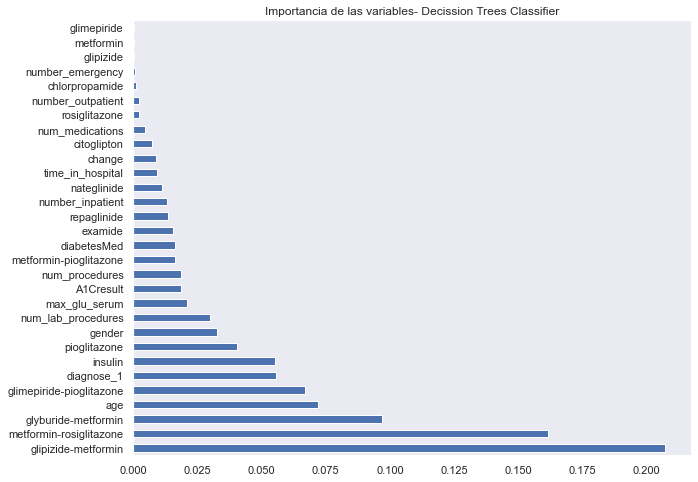

In [577]:
feature_importancetrees=pd.Series(ct2.feature_importances_,index=x.columns)
feature_importancetrees.nlargest(30).plot(kind='barh', figsize=(10,8),grid=False)
plt.title('Importancia de las variables- Decission Trees Classifier')
plt.show()

- Se gráfica la importancia de las variables en este ajuste basándose en el criterio que es el modelo cuyo Accuracy es mayor (existe empate con otros modelos, pero la interpretación es más fácil, ya que no se trata de variables binarias o de PCA, son las mismas variables sólo que codificadas bajo en enfoque de Frequency encoding). 

- Observe que las 5 variables más relevantes fueron: glipzide_metformin, metformin-rosiglitazone, glyburide-metformin, age, glimepiride-pioglitazone, cuatro de ellas son medicamentos para tartaar la diabetes.

- 3

In [524]:
ct3 = DecisionTreeClassifier(criterion='gini')
ct3.fit(x_train3,y_train3)
y_predct3=ct3.predict(x_test3)
# Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test3, y_predct3)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test3,y_predct3)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test3, y_predct3))

Accuracy: 0.48
Confusion Matrix: 
 [[ 170  439  650]
 [ 485 1545 2418]
 [ 813 2649 5135]]
              precision    recall  f1-score   support

           0       0.12      0.14      0.12      1259
           1       0.33      0.35      0.34      4448
           2       0.63      0.60      0.61      8597

    accuracy                           0.48     14304
   macro avg       0.36      0.36      0.36     14304
weighted avg       0.49      0.48      0.48     14304



- 4

In [525]:
ct4 = DecisionTreeClassifier(criterion='gini')
ct4.fit(x_train4,y_train4)
y_predct4=ct4.predict(x_test4)
# Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test4, y_predct4)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test4,y_predct4)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test4, y_predct4))

Accuracy: 0.48
Confusion Matrix: 
 [[ 137  451  671]
 [ 520 1446 2482]
 [ 747 2581 5269]]
              precision    recall  f1-score   support

           0       0.10      0.11      0.10      1259
           1       0.32      0.33      0.32      4448
           2       0.63      0.61      0.62      8597

    accuracy                           0.48     14304
   macro avg       0.35      0.35      0.35     14304
weighted avg       0.49      0.48      0.48     14304



- 5

In [526]:
ct5 = DecisionTreeClassifier(criterion='gini')
ct5.fit(x_train5,y_train5)
y_predct5=ct5.predict(x_test5)
# Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test5, y_predct5)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test5,y_predct5)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test5, y_predct5))

Accuracy: 0.48
Confusion Matrix: 
 [[ 136  444  679]
 [ 462 1537 2449]
 [ 787 2588 5222]]
              precision    recall  f1-score   support

           0       0.10      0.11      0.10      1259
           1       0.34      0.35      0.34      4448
           2       0.63      0.61      0.62      8597

    accuracy                           0.48     14304
   macro avg       0.35      0.35      0.35     14304
weighted avg       0.49      0.48      0.49     14304



- 6

In [527]:
ct6 = DecisionTreeClassifier(criterion='gini')
ct6.fit(x_train6,y_train6)
y_predct6=ct6.predict(x_test6)
# Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test6, y_predct6)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test6,y_predct6)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test6, y_predct6))

Accuracy: 0.47
Confusion Matrix: 
 [[ 136  398  725]
 [ 462 1448 2538]
 [ 769 2688 5140]]
              precision    recall  f1-score   support

           0       0.10      0.11      0.10      1259
           1       0.32      0.33      0.32      4448
           2       0.61      0.60      0.60      8597

    accuracy                           0.47     14304
   macro avg       0.34      0.34      0.34     14304
weighted avg       0.48      0.47      0.47     14304



- 7

In [528]:
ct7 = DecisionTreeClassifier(criterion='gini')
ct7.fit(x_train7,y_train7)
y_predct7=ct7.predict(x_test7)
# Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test7, y_predct7)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test7,y_predct7)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test7, y_predct7))

Accuracy: 0.47
Confusion Matrix: 
 [[ 116  442  701]
 [ 420 1470 2558]
 [ 713 2761 5123]]
              precision    recall  f1-score   support

           0       0.09      0.09      0.09      1259
           1       0.31      0.33      0.32      4448
           2       0.61      0.60      0.60      8597

    accuracy                           0.47     14304
   macro avg       0.34      0.34      0.34     14304
weighted avg       0.47      0.47      0.47     14304



- 8

In [529]:
ct8 = DecisionTreeClassifier(criterion='gini')
ct8.fit(x_train8,y_train8)
y_predct8=ct8.predict(x_test8)
# Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test8, y_predct8)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test8,y_predct8)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test8, y_predct8))

Accuracy: 0.48
Confusion Matrix: 
 [[ 129  404  726]
 [ 472 1490 2486]
 [ 758 2597 5242]]
              precision    recall  f1-score   support

           0       0.09      0.10      0.10      1259
           1       0.33      0.33      0.33      4448
           2       0.62      0.61      0.61      8597

    accuracy                           0.48     14304
   macro avg       0.35      0.35      0.35     14304
weighted avg       0.48      0.48      0.48     14304



##### Conclusiones trees

- Para este caso, los áboles no presentaron un buen desempeño. Fue muy bajo, a pesar que los árboles normalmente reciben variables categóricas, para el .fit() de Skelarn se debe de pasar variables numéricas. Quiza las codificaciones de las variables, como el OneHotEncoding generaron muchas variables y no permitieron una buena clasificación. No obstante se pensó que con la aproximación de Frequency encoding, que no genera tantas variables como OneHot, tendría un mejor desempeño. Las 5 variables más relevantes fueron: glipzide_metformin, metformin-rosiglitazone, glyburide-metformin, age, glimepiride-pioglitazone, todas menos age, fueron medicinas génericas para tratar la diabetes.
- Los árboles tienen el problema de tener alta varianza, se puede corregir con Random forest.

### Regresión logística

In [530]:
from sklearn.linear_model import LogisticRegression

- Se usa regularización combinada L1 y L2 elastic net para controlar por el gran número de variables.

- 1

In [531]:
log1=LogisticRegression(random_state=123, penalty="elasticnet", solver='saga',l1_ratio=0.5)
log1.fit(x_train1, y_train1)
y_predlog1=log1.predict(x_test1)
#Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test1, y_predlog1)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test1,y_predlog1)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test1, y_predlog1))

Accuracy: 0.61
Confusion Matrix: 
 [[   3  154 1102]
 [   0  481 3967]
 [   0  369 8228]]
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      1259
           1       0.48      0.11      0.18      4448
           2       0.62      0.96      0.75      8597

    accuracy                           0.61     14304
   macro avg       0.70      0.36      0.31     14304
weighted avg       0.61      0.61      0.51     14304



C:\Users\julian\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


- 2

In [532]:
log2=LogisticRegression(random_state=123, penalty="elasticnet", solver='saga',l1_ratio=0.5)
log2.fit(x_train2, y_train2)
y_predlog2=log2.predict(x_test2)
#Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test2, y_predlog2)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test2,y_predlog2)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test2, y_predlog2))

Accuracy: 0.61
Confusion Matrix: 
 [[   2  130 1127]
 [   0  440 4008]
 [   1  288 8308]]
              precision    recall  f1-score   support

           0       0.67      0.00      0.00      1259
           1       0.51      0.10      0.17      4448
           2       0.62      0.97      0.75      8597

    accuracy                           0.61     14304
   macro avg       0.60      0.36      0.31     14304
weighted avg       0.59      0.61      0.50     14304



C:\Users\julian\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


- 3

In [533]:
log3=LogisticRegression(random_state=123, penalty="elasticnet", solver='saga',l1_ratio=0.5)
log3.fit(x_train3, y_train3)
y_predlog3=log3.predict(x_test3)
#Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test3, y_predlog3)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test3,y_predlog3)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test3, y_predlog3))

Accuracy: 0.61
Confusion Matrix: 
 [[   5  147 1107]
 [   0  432 4016]
 [   1  308 8288]]
              precision    recall  f1-score   support

           0       0.83      0.00      0.01      1259
           1       0.49      0.10      0.16      4448
           2       0.62      0.96      0.75      8597

    accuracy                           0.61     14304
   macro avg       0.65      0.36      0.31     14304
weighted avg       0.60      0.61      0.50     14304



C:\Users\julian\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


- 4

In [534]:
log4=LogisticRegression(random_state=123, penalty="elasticnet", solver='saga',l1_ratio=0.5)
log4.fit(x_train4, y_train4)
y_predlog4=log4.predict(x_test4)
#Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test4, y_predlog4)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test4,y_predlog4)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test4, y_predlog4))

Accuracy: 0.61
Confusion Matrix: 
 [[   1  138 1120]
 [   1  392 4055]
 [   1  277 8319]]
              precision    recall  f1-score   support

           0       0.33      0.00      0.00      1259
           1       0.49      0.09      0.15      4448
           2       0.62      0.97      0.75      8597

    accuracy                           0.61     14304
   macro avg       0.48      0.35      0.30     14304
weighted avg       0.55      0.61      0.50     14304



C:\Users\julian\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


- 5

In [535]:
log5=LogisticRegression(random_state=123, penalty="elasticnet", solver='saga',l1_ratio=0.5)
log5.fit(x_train5, y_train5)
y_predlog5=log5.predict(x_test5)
#Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test5, y_predlog5)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test5,y_predlog5)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test5, y_predlog5))

Accuracy: 0.61
Confusion Matrix: 
 [[   1  128 1130]
 [   2  450 3996]
 [   2  294 8301]]
              precision    recall  f1-score   support

           0       0.20      0.00      0.00      1259
           1       0.52      0.10      0.17      4448
           2       0.62      0.97      0.75      8597

    accuracy                           0.61     14304
   macro avg       0.44      0.36      0.31     14304
weighted avg       0.55      0.61      0.51     14304



C:\Users\julian\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


- 6

In [536]:
log6=LogisticRegression(random_state=123, solver='saga')
log6.fit(x_train6, y_train6)
y_predlog6=log6.predict(x_test6)
#Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test6, y_predlog6)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test6,y_predlog6)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test6, y_predlog6))

Accuracy: 0.60
Confusion Matrix: 
 [[   0    0 1259]
 [   0    2 4446]
 [   0    0 8597]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1259
           1       1.00      0.00      0.00      4448
           2       0.60      1.00      0.75      8597

    accuracy                           0.60     14304
   macro avg       0.53      0.33      0.25     14304
weighted avg       0.67      0.60      0.45     14304



C:\Users\julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- 7

In [537]:
log7=LogisticRegression(random_state=123, solver='saga')
log7.fit(x_train7, y_train7)
y_predlog7=log7.predict(x_test7)
#Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test7, y_predlog7)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test7,y_predlog7)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test7, y_predlog7))

Accuracy: 0.60
Confusion Matrix: 
 [[   0    0 1259]
 [   0    0 4448]
 [   0    0 8597]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1259
           1       0.00      0.00      0.00      4448
           2       0.60      1.00      0.75      8597

    accuracy                           0.60     14304
   macro avg       0.20      0.33      0.25     14304
weighted avg       0.36      0.60      0.45     14304



C:\Users\julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- 8

In [538]:
log8=LogisticRegression(random_state=123, solver='saga')
log8.fit(x_train8, y_train8)
y_predlog8=log8.predict(x_test8)
#Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test8, y_predlog8)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test8,y_predlog8)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test8, y_predlog8))

Accuracy: 0.60
Confusion Matrix: 
 [[   0   88 1171]
 [   0  284 4164]
 [   0  234 8363]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1259
           1       0.47      0.06      0.11      4448
           2       0.61      0.97      0.75      8597

    accuracy                           0.60     14304
   macro avg       0.36      0.35      0.29     14304
weighted avg       0.51      0.60      0.49     14304



C:\Users\julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Conclusión logit

- Se obtuvieron mejores desempñeos que con árboles, esta fue la aproximación del paper, salvo que en este se trato de un problema de clasificación binario, en eset caso sería logit multiclase.

## Random Forest

In [539]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

- 1

In [540]:
rf1 = RandomForestClassifier(n_estimators=200,verbose=1,min_samples_leaf=5)
rf1.fit(x_train1,y_train1)
y_predrf1=rf1.predict(x_test1)
#Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test1, y_predrf1)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test1,y_predrf1)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test1, y_predrf1))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   20.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy: 0.61
Confusion Matrix: 
 [[   0  142 1117]
 [   0  459 3989]
 [   0  324 8273]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1259
           1       0.50      0.10      0.17      4448
           2       0.62      0.96      0.75      8597

    accuracy                           0.61     14304
   macro avg       0.37      0.36      0.31     14304
weighted avg       0.53      0.61      0.51     14304



[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.0s finished
C:\Users\julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- 2

In [541]:
rf2 = RandomForestClassifier(n_estimators=200,verbose=1,min_samples_leaf=5)
rf2.fit(x_train2,y_train2)
y_predrf2=rf2.predict(x_test2)
#Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test2, y_predrf2)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test2,y_predrf2)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test2, y_predrf2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   18.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy: 0.61
Confusion Matrix: 
 [[   0  165 1094]
 [   0  589 3859]
 [   0  444 8153]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1259
           1       0.49      0.13      0.21      4448
           2       0.62      0.95      0.75      8597

    accuracy                           0.61     14304
   macro avg       0.37      0.36      0.32     14304
weighted avg       0.53      0.61      0.52     14304



[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished
C:\Users\julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Se gráfica la importancia de las variables en este ajuste basándose en el criterio que es el modelo cuyo Accuracy es mayor (existe empate con otros modelos, pero la interpretación es más fácil, ya que no se trata de variables binarias o de PCA, son las mismas variables sólo que codificadas bajo en enfoque de Frequency encoding). 

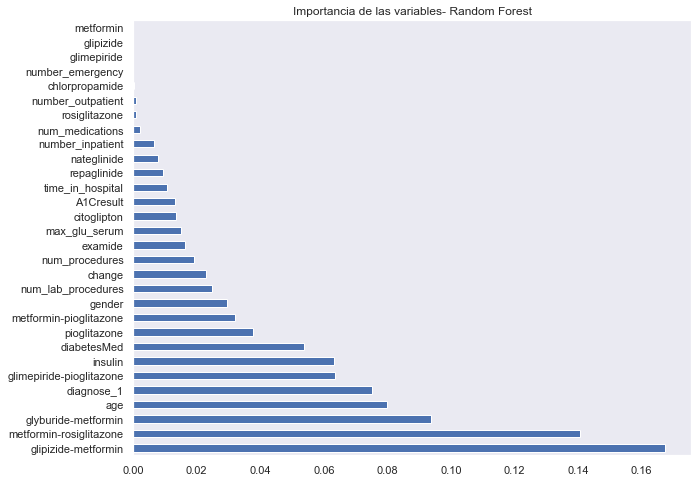

In [580]:
feature_importancerf=pd.Series(rf2.feature_importances_,index=x.columns)
feature_importancerf.nlargest(30).plot(kind='barh', figsize=(10,8),grid=False)
plt.title('Importancia de las variables- Random Forest')
plt.show()

- Note que al igual que en el algortimo de árboles de clasificación, las variables más relevantes fueron medicinas: glipzide-metformin, metformin-rosiglitazone, glyburide-metformin, age, diagnose_1, salvo que las dos últimas está age y el diagnóstico.

- 3

In [542]:
rf3 = RandomForestClassifier(n_estimators=200,verbose=1,min_samples_leaf=5)
rf3.fit(x_train3,y_train3)
y_predrf3=rf3.predict(x_test3)
#Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test3, y_predrf3)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test3,y_predrf3)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test3, y_predrf3))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   19.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy: 0.61
Confusion Matrix: 
 [[   0  166 1093]
 [   0  441 4007]
 [   0  348 8249]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1259
           1       0.46      0.10      0.16      4448
           2       0.62      0.96      0.75      8597

    accuracy                           0.61     14304
   macro avg       0.36      0.35      0.30     14304
weighted avg       0.51      0.61      0.50     14304



[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished
C:\Users\julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- 4

In [543]:
rf4 = RandomForestClassifier(n_estimators=200,verbose=1,min_samples_leaf=5)
rf4.fit(x_train4,y_train4)
y_predrf4=rf4.predict(x_test4)
#Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test4, y_predrf4)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test4,y_predrf4)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test4, y_predrf4))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   16.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy: 0.61
Confusion Matrix: 
 [[   0  176 1083]
 [   0  545 3903]
 [   0  410 8187]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1259
           1       0.48      0.12      0.20      4448
           2       0.62      0.95      0.75      8597

    accuracy                           0.61     14304
   macro avg       0.37      0.36      0.32     14304
weighted avg       0.52      0.61      0.51     14304



[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.8s finished
C:\Users\julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- 5

In [544]:
rf5 = RandomForestClassifier(n_estimators=200,verbose=1,min_samples_leaf=5)
rf5.fit(x_train5,y_train5)
y_predrf5=rf5.predict(x_test5)
#Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test5, y_predrf5)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test5,y_predrf5)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test5, y_predrf5))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   15.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy: 0.61
Confusion Matrix: 
 [[   0  154 1105]
 [   0  586 3862]
 [   0  431 8166]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1259
           1       0.50      0.13      0.21      4448
           2       0.62      0.95      0.75      8597

    accuracy                           0.61     14304
   macro avg       0.37      0.36      0.32     14304
weighted avg       0.53      0.61      0.52     14304



[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished
C:\Users\julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- 6

In [545]:
rf6 = RandomForestClassifier(n_estimators=200,verbose=1,min_samples_leaf=5)
rf6.fit(x_train6,y_train6)
y_predrf6=rf6.predict(x_test6)
#Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test6, y_predrf6)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test6,y_predrf6)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test6, y_predrf6))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy: 0.57
Confusion Matrix: 
 [[   2  223 1034]
 [   8  804 3636]
 [  12 1275 7310]]
              precision    recall  f1-score   support

           0       0.09      0.00      0.00      1259
           1       0.35      0.18      0.24      4448
           2       0.61      0.85      0.71      8597

    accuracy                           0.57     14304
   macro avg       0.35      0.34      0.32     14304
weighted avg       0.48      0.57      0.50     14304



[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.0s finished


- 7

In [546]:
rf7 = RandomForestClassifier(n_estimators=200,verbose=1,min_samples_leaf=5)
rf7.fit(x_train7,y_train7)
y_predrf7=rf7.predict(x_test7)
#Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test7, y_predrf7)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test7,y_predrf7)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test7, y_predrf7))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   40.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy: 0.58
Confusion Matrix: 
 [[   0  165 1094]
 [   0  577 3871]
 [   5  859 7733]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1259
           1       0.36      0.13      0.19      4448
           2       0.61      0.90      0.73      8597

    accuracy                           0.58     14304
   macro avg       0.32      0.34      0.31     14304
weighted avg       0.48      0.58      0.50     14304



[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished


- 8

In [547]:
rf8 = RandomForestClassifier(n_estimators=200,verbose=1,min_samples_leaf=5)
rf8.fit(x_train8,y_train8)
y_predrf8=rf8.predict(x_test8)
#Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test8, y_predrf8)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test8,y_predrf8)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test8, y_predrf8))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   40.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy: 0.60
Confusion Matrix: 
 [[   4  188 1067]
 [   3  717 3728]
 [   1  689 7907]]
              precision    recall  f1-score   support

           0       0.50      0.00      0.01      1259
           1       0.45      0.16      0.24      4448
           2       0.62      0.92      0.74      8597

    accuracy                           0.60     14304
   macro avg       0.52      0.36      0.33     14304
weighted avg       0.56      0.60      0.52     14304



[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.0s finished


##### Conclusiones Random Forest

- Se obtuvo desempñeo igual que logit y mejor que árboles. Se espera que el uso de estos métodos de remuestreo de árboles mejore la varianza y la estimación. Las variables más relevantes coinciden con las de árboles, salvo que se introduce el diagnóstico.

### Boosting Adaboost

- Se usa Meta algoritmo Boosting con Adaboost

- 1

In [548]:
boosting1 = AdaBoostClassifier(n_estimators=200)
boosting1.fit(x_train1,y_train1)
y_predboosting1 = boosting1.predict(x_test1)
#Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test1, y_predboosting1)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test1,y_predboosting1)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test1, y_predboosting1))

Accuracy: 0.61
Confusion Matrix: 
 [[   6  202 1051]
 [  10  641 3797]
 [   0  485 8112]]
              precision    recall  f1-score   support

           0       0.38      0.00      0.01      1259
           1       0.48      0.14      0.22      4448
           2       0.63      0.94      0.75      8597

    accuracy                           0.61     14304
   macro avg       0.49      0.36      0.33     14304
weighted avg       0.56      0.61      0.52     14304



- 2

In [549]:
boosting2 = AdaBoostClassifier(n_estimators=200)
boosting2.fit(x_train2,y_train2)
y_predboosting2 = boosting2.predict(x_test2)
#Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test2, y_predboosting2)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test2,y_predboosting2)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test2, y_predboosting2))

Accuracy: 0.61
Confusion Matrix: 
 [[   2  200 1057]
 [   7  595 3846]
 [   3  456 8138]]
              precision    recall  f1-score   support

           0       0.17      0.00      0.00      1259
           1       0.48      0.13      0.21      4448
           2       0.62      0.95      0.75      8597

    accuracy                           0.61     14304
   macro avg       0.42      0.36      0.32     14304
weighted avg       0.54      0.61      0.52     14304



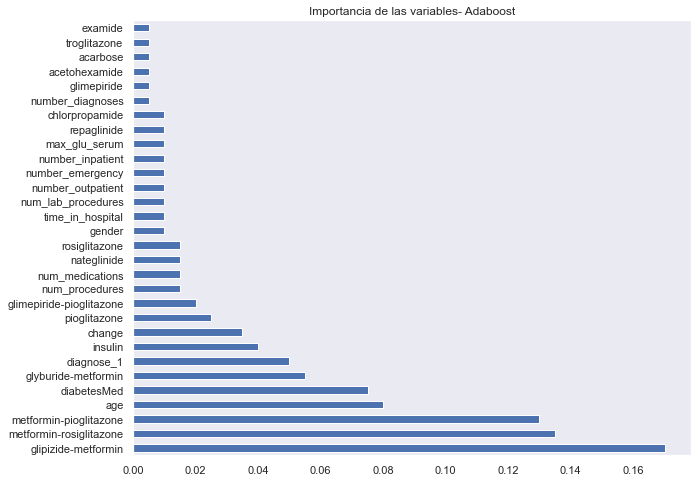

In [581]:
feature_importanceboost=pd.Series(boosting2.feature_importances_,index=x.columns)
feature_importanceboost.nlargest(30).plot(kind='barh', figsize=(10,8),grid=False)
plt.title('Importancia de las variables- Adaboost')
plt.show()

- Las variables más relevantes fueron: glipzide-metformin, metformin-rosiglitazone, metformin-pioglitazone, age, diabtesMed, las medicinas para el tratamiento de la enfermedad, la edad y la Dummy relacionada con si tiene prescripción de medicina para diabéticos.

- 3

In [550]:
boosting3 = AdaBoostClassifier(n_estimators=200)
boosting3.fit(x_train3,y_train3)
y_predboosting3 = boosting3.predict(x_test3)
#Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test3, y_predboosting2)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test2,y_predboosting2)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test2, y_predboosting2))

Accuracy: 0.57
Confusion Matrix: 
 [[   2  200 1057]
 [   7  595 3846]
 [   3  456 8138]]
              precision    recall  f1-score   support

           0       0.17      0.00      0.00      1259
           1       0.48      0.13      0.21      4448
           2       0.62      0.95      0.75      8597

    accuracy                           0.61     14304
   macro avg       0.42      0.36      0.32     14304
weighted avg       0.54      0.61      0.52     14304



- 4

In [551]:
boosting4 = AdaBoostClassifier(n_estimators=200)
boosting4.fit(x_train4,y_train4)
y_predboosting4 = boosting4.predict(x_test4)
#Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test4, y_predboosting4)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test4,y_predboosting4)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test4, y_predboosting4))

Accuracy: 0.61
Confusion Matrix: 
 [[   3  195 1061]
 [   4  599 3845]
 [   1  441 8155]]
              precision    recall  f1-score   support

           0       0.38      0.00      0.00      1259
           1       0.49      0.13      0.21      4448
           2       0.62      0.95      0.75      8597

    accuracy                           0.61     14304
   macro avg       0.49      0.36      0.32     14304
weighted avg       0.56      0.61      0.52     14304



- 5

In [552]:
boosting5 = AdaBoostClassifier(n_estimators=200)
boosting5.fit(x_train5,y_train5)
y_predboosting5 = boosting5.predict(x_test5)
#Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test5, y_predboosting5)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test5,y_predboosting5)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test5, y_predboosting5))

Accuracy: 0.61
Confusion Matrix: 
 [[   4  158 1097]
 [   3  614 3831]
 [   2  417 8178]]
              precision    recall  f1-score   support

           0       0.44      0.00      0.01      1259
           1       0.52      0.14      0.22      4448
           2       0.62      0.95      0.75      8597

    accuracy                           0.61     14304
   macro avg       0.53      0.36      0.33     14304
weighted avg       0.57      0.61      0.52     14304



- 6

In [553]:
boosting6 = AdaBoostClassifier(n_estimators=200)
boosting6.fit(x_train6,y_train6)
y_predboosting6 = boosting6.predict(x_test6)
#Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test6, y_predboosting6)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test6,y_predboosting6)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test6, y_predboosting6))

Accuracy: 0.60
Confusion Matrix: 
 [[   0    8 1251]
 [   1   28 4419]
 [   4   35 8558]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1259
           1       0.39      0.01      0.01      4448
           2       0.60      1.00      0.75      8597

    accuracy                           0.60     14304
   macro avg       0.33      0.33      0.25     14304
weighted avg       0.48      0.60      0.45     14304



- 7

In [554]:
boosting7 = AdaBoostClassifier(n_estimators=200)
boosting7.fit(x_train7,y_train7)
y_predboosting7 = boosting7.predict(x_test7)
#Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test7, y_predboosting7)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test7,y_predboosting7)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test7, y_predboosting7))

Accuracy: 0.60
Confusion Matrix: 
 [[   0    2 1257]
 [   0    5 4443]
 [   1    7 8589]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1259
           1       0.36      0.00      0.00      4448
           2       0.60      1.00      0.75      8597

    accuracy                           0.60     14304
   macro avg       0.32      0.33      0.25     14304
weighted avg       0.47      0.60      0.45     14304



- 8

In [555]:
boosting8 = AdaBoostClassifier(n_estimators=200)
boosting8.fit(x_train8,y_train8)
y_predboosting8 = boosting8.predict(x_test8)
#Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test8, y_predboosting8)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test8,y_predboosting8)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test8, y_predboosting8))

Accuracy: 0.61
Confusion Matrix: 
 [[   0  136 1123]
 [   0  411 4037]
 [   0  295 8302]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1259
           1       0.49      0.09      0.16      4448
           2       0.62      0.97      0.75      8597

    accuracy                           0.61     14304
   macro avg       0.37      0.35      0.30     14304
weighted avg       0.52      0.61      0.50     14304



C:\Users\julian\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Conclusiones Boosting

- Se obtienen un desempñeo igual al random Forest, las variables más relevantes vuelven a ser los medicamnetos para el tratamiento de esta enfermedad, la edad y la dummy de si se medica para diabetes, la cual se correlaciona con el hecho que tome cierta medicina genérica para diabetes.

## Naive Bayes

- Este clasificador puede tener problemas pues asume independencia de los atributos, y posiblemente no exista dicha independencia.

In [557]:
from sklearn.naive_bayes import GaussianNB
nb1 = GaussianNB()
nb1.fit(x_train1, y_train1)
y_prednb1 = nb1.predict(x_test1)
# Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test1, y_prednb1)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test1,y_prednb1)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test1, y_prednb1))

Accuracy: 0.10
Confusion Matrix: 
 [[1217   22   20]
 [4285   82   81]
 [8265  130  202]]
              precision    recall  f1-score   support

           0       0.09      0.97      0.16      1259
           1       0.35      0.02      0.04      4448
           2       0.67      0.02      0.05      8597

    accuracy                           0.10     14304
   macro avg       0.37      0.34      0.08     14304
weighted avg       0.52      0.10      0.05     14304



- Es pésimo su desempeño.
- Se prueba con Frquency encoding.

In [558]:
nb2 = GaussianNB()
nb2.fit(x_train2, y_train2)
y_prednb2 = nb2.predict(x_test2)
# Accuracy y matriz de confusión
accuracy = metrics.accuracy_score(y_test2, y_prednb2)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_test2,y_prednb2)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test2, y_prednb2))

Accuracy: 0.10
Confusion Matrix: 
 [[1237   22    0]
 [4325  120    3]
 [8431  160    6]]
              precision    recall  f1-score   support

           0       0.09      0.98      0.16      1259
           1       0.40      0.03      0.05      4448
           2       0.67      0.00      0.00      8597

    accuracy                           0.10     14304
   macro avg       0.38      0.34      0.07     14304
weighted avg       0.53      0.10      0.03     14304



##### Conclusiones Naive Bayes

- Se obtiene el peor de lso resultados, posiblemente el supuesto de independencia en los atributos sea muy fuerte en este caso, donde los atributos están muy correlacionados.

In [560]:
import gc
gc.collect()

25294

## Light GBM

- Permite pasar las variables categóricas sin antes voilverlas numéricas

In [561]:
import lightgbm as lgb

In [562]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71518 entries, 0 to 101765
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   gender                    71518 non-null  category
 1   age                       71518 non-null  category
 2   time_in_hospital          71518 non-null  int64   
 3   num_lab_procedures        71518 non-null  int64   
 4   num_procedures            71518 non-null  int64   
 5   num_medications           71518 non-null  int64   
 6   number_outpatient         71518 non-null  int64   
 7   number_emergency          71518 non-null  int64   
 8   number_inpatient          71518 non-null  int64   
 9   number_diagnoses          71518 non-null  int64   
 10  max_glu_serum             71518 non-null  category
 11  A1Cresult                 71518 non-null  category
 12  metformin                 71518 non-null  category
 13  repaglinide               71518 non-null  cat

In [563]:
x = data.drop(columns = ['readmitted'])

In [564]:
for c in x.columns:
    col_type = x[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        x[c] = x[c].astype('category')

In [565]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=123, stratify=y)

In [566]:
cflgb = lgb.LGBMClassifier(loss_function= 'Logloss', custom_metric=['Accuracy'],eval_metric='F1')
cflgb.fit(x_train, y_train, eval_set=(x_test, y_test), feature_name='auto', categorical_feature = 'auto', verbose=50)
print(); print(cflgb)
y_predlgb = cflgb.predict(x_test)
print(); print(metrics.classification_report(y_test, y_predlgb))
print(); print(metrics.confusion_matrix(y_test, y_predlgb))

[50]	valid_0's multi_logloss: 0.848418
[100]	valid_0's multi_logloss: 0.848778

LGBMClassifier(custom_metric=['Accuracy'], eval_metric='F1',
               loss_function='Logloss')

              precision    recall  f1-score   support

           0       0.40      0.00      0.01      1259
           1       0.49      0.15      0.22      4448
           2       0.63      0.95      0.75      8597

    accuracy                           0.61     14304
   macro avg       0.51      0.36      0.33     14304
weighted avg       0.56      0.61      0.52     14304


[[   4  197 1058]
 [   6  646 3796]
 [   0  470 8127]]


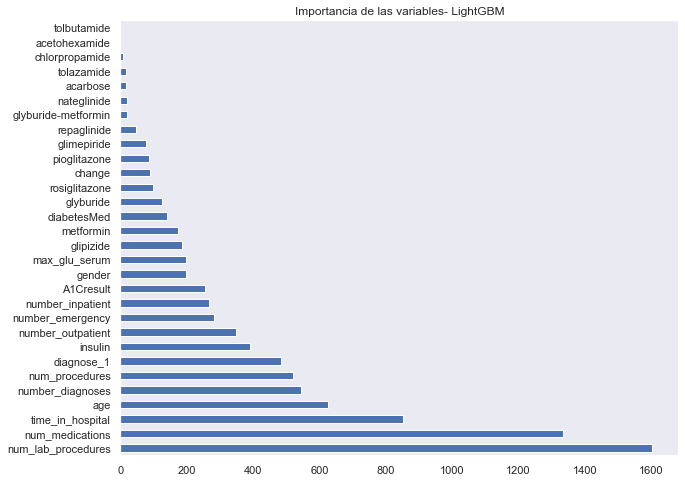

In [567]:
feature_importance=pd.Series(cflgb.feature_importances_,index=x.columns)
feature_importance.nlargest(30).plot(kind='barh', figsize=(10,8),grid=False)
plt.title('Importancia de las variables- LightGBM')
plt.show()

- Las variables más relevantes fueron numéricas a digferencia de los otros algortimos, indicando que el número de diagnósticos, procedimientos, pruebas, edad y el tiempo en el hospital explican la clasificación de la variable dependiente.

##### Conclusiones Light GBM

- Este algoritmo es interesante pues permite introducir las variables categóricas sin realizarse un preprocesamiento previo que pueda llegar a distorsionar la relación de estas variable so a generar problemas muy dispersos por la alta dimensionalidad. Dejando de lado esto, indica que las variables más relevantes son númericas que pueden ser proxies de que tan malo es el estado del paciente, pues mayor tiempo de estancia en el hospital, más estudios y pruebas y una edad avanzada pueden hacer que la persona vuelva al hospital.

### CatBoost

In [568]:
from catboost import CatBoostClassifier

In [569]:
data_cat1=data_cat.drop(['readmitted'],axis=1)
data1=data.drop(['readmitted'],axis=1)

In [570]:
categorical_names=data_cat1.columns.tolist()
print(categorical_names)

['gender', 'age', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'diagnose_1']


In [571]:
categoricals = [data1.columns.get_loc(i) for i in categorical_names]
print(categoricals)

[0, 1, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]


In [572]:
from sklearn.multiclass import OneVsRestClassifier

In [573]:
ovr = OneVsRestClassifier(estimator=CatBoostClassifier(iterations=10,random_state=123, cat_features=categoricals, loss_function= 'Logloss', custom_metric=['Accuracy'], eval_metric='F1'))
ovr.fit(x_train,y_train)
y_predovrcatboost=ovr.predict(x_test)
print(); print(ovr)
print(); print(metrics.classification_report(y_test, y_predovrcatboost))
print(); print(metrics.confusion_matrix(y_test, y_predovrcatboost))

Learning rate set to 0.5
0:	learn: 0.0003972	total: 79.9ms	remaining: 719ms
1:	learn: 0.0003972	total: 160ms	remaining: 640ms
2:	learn: 0.0003972	total: 213ms	remaining: 498ms
3:	learn: 0.0003972	total: 275ms	remaining: 413ms
4:	learn: 0.0011912	total: 332ms	remaining: 332ms
5:	learn: 0.0007943	total: 400ms	remaining: 267ms
6:	learn: 0.0015876	total: 432ms	remaining: 185ms
7:	learn: 0.0039643	total: 506ms	remaining: 127ms
8:	learn: 0.0035686	total: 564ms	remaining: 62.7ms
9:	learn: 0.0039651	total: 622ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.0074789	total: 60.7ms	remaining: 546ms
1:	learn: 0.0078186	total: 126ms	remaining: 503ms
2:	learn: 0.0220507	total: 172ms	remaining: 401ms
3:	learn: 0.0372022	total: 252ms	remaining: 379ms
4:	learn: 0.0428154	total: 295ms	remaining: 295ms
5:	learn: 0.0476293	total: 341ms	remaining: 227ms
6:	learn: 0.0468051	total: 369ms	remaining: 158ms
7:	learn: 0.0566763	total: 427ms	remaining: 107ms
8:	learn: 0.0619488	total: 489ms	remaining: 54.3m

##### Conclusiones Catboost

- El desempñeo de este modelo es igual al de Random Forest, AdaBoost, entre otros. El boost sobre categorias sólo está pensado para una clasificación de dos clases, por tal motivo debió emplearse una clasificación one vs de rest, dond eprimero se predecia la categoria 1 contra las otra sdos agrupadas como el resto, luego se hace esto mismo para la categoría dos y finalmente para la categoria tres.

# INSIGHTS Y CONCLUSIONES

- Se emplearon varios clasificadores y el desempñeo de clasificación multiclase no es tan bueno, es un poco por encima del chance.
- Se contaba con un problema donde había muchas variables categóricas que necesitaban ser tratadas y preprocesadas. Por tal motivo, se recurrió a los Encodings (OneHOt, Frequency), a la reducción de dimensionalidad mediante PCA. Estos tratamientos pueden generar problemas en las estimaciones al llevar a problemas de alta dimensionalidad e insertar mucha complejidad al modelo.
- Se encuentra que en casi todos los algoritmos, las variables relavantes son similares, haciendo alución a medicamentos genéricos para tratar la diabetes, también resalta la edad. Al parecer la edad (ser más viejo o no) afecta si reingreso o no, lo cual tiene sentido, al suponer que una edad avanzada significan más quebrantos de salud. Asimismo, otra variable importante fue el diagnóstico, lo cual también se relaciona con el hecho que diagnósticos más graves posiblemente influirán en si reingreso o no. Con la implementanción del light GBM se pudo pasar los datos categóricos como tal sin necesidad de codificarlos y se obtuvo que las varaibles relevantes eran numéricas relacionadas con el tiempo de estancia en el hospital, la cantidad de procedimientos y pruebas, y la edad. Todas estan pueden asociarse como proxy de un mal estado o de quebrantos de salud, que llevan a que se le realicen más estudios y pruebas al paciente y que su condición se agrave lo cual posiblemnete incida en que vuelva o no a ser admitido en un futuro.
- Se puede realizar mayor trabajo con el feature engineering, seleccionando otras variables o generando interacciones entre variables que resultaron relevantes, paar esto se necesita un backgroung médico que permita crear las interacciones pertinentes entre esta svariables.
- Puede asimismo pensarse en la posibilidad de realziar una estimación one VS de rest para volver este problema de clasificación binario y probarlo sobre los algoritmos. Esto sólo se hizo sobre el CatBoost debido a que sólo podía hacerse sobre escenarios de clasificación de dos clases.
- Puede pensarse en que hacer con los outliers de algunas variables, si la imputación de ciertos valores haría que perdiera variabilidad en dicho atributo (dado que casi toda la variable estaba representada por un valor y los únicos qu ele daban variabilidad a esta seran los outliers) o no y su impacto en la estimación.
- Podría pensarse que hay un problema de desbalance de clases en las categorías, como pudo observarse, la categoría <30 días para readmisión tiene muy pocas observaciones, podría tratarse a futuro, con sobremuestreo que nivele las clases y junto la implementación de meta algoritmos como Boosting que permite ir sopesando por pesos las clasificaciones de manera secuencial.
- Podría realizarse un hyper parameter tunning. El cual podria brindar la elección de parámetrso óptimos qu epermitan un mejor desempñeo. Esta aproximación se desistió porque se contaba con muchas aproximaciones de diferentes encodings además de modelos.